In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

## About Dataset

This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed.

- #: ID for each pokemon
- Name: Name of each pokemon
- Type 1: Each pokemon has a type, this determines weakness/resistance to attacks
- Type 2: Some pokemon are dual type and have 2
- Total: sum of all stats that come after this, a general guide to how strong a pokemon is
- HP: hit points, or health, defines how much damage a pokemon can withstand before fainting
- Attack: the base modifier for normal attacks (eg. Scratch, Punch)
- Defense: the base damage resistance against normal attacks
- SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
- SP Def: the base damage resistance against special attacks
- Speed: determines which pokemon attacks first each round

In [2]:
pokemon = pd.read_csv("Pokemon.csv", index_col=0)
pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Text(0.5, 1.0, 'Pokemon Attack Distribution')

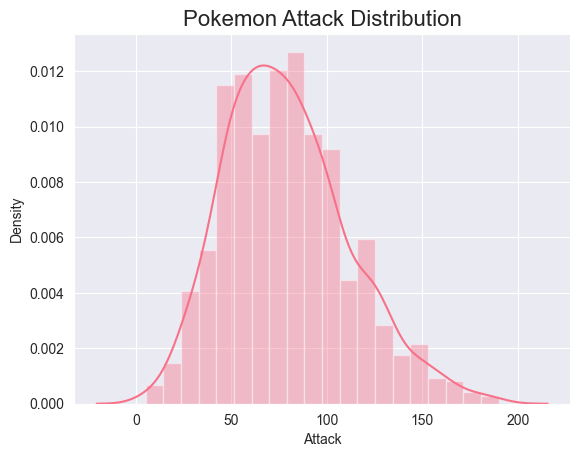

In [3]:
sns.set_palette("husl", 8)
ax = sns.distplot(pokemon['Attack'])
ax.set_title("Pokemon Attack Distribution", fontdict={'fontsize': 16})

Text(0.5, 1.0, 'Attack vs Defense and Legendary data')

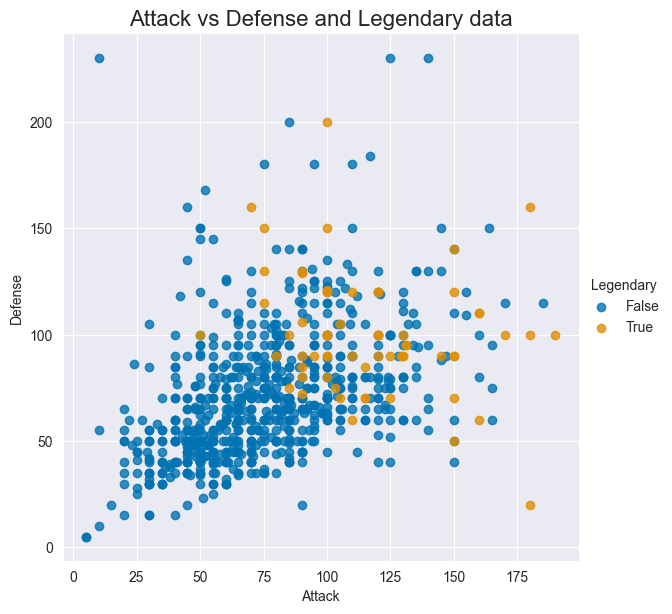

In [4]:
sns.set_palette("colorblind")
sns.lmplot(x = "Attack", y = "Defense", data = pokemon, hue = "Legendary", height = 6, fit_reg = False)
plt.title("Attack vs Defense and Legendary data", fontsize = 16)

Text(0.5, 1.0, 'Frequency of Type 1 data seperated by Legendary')

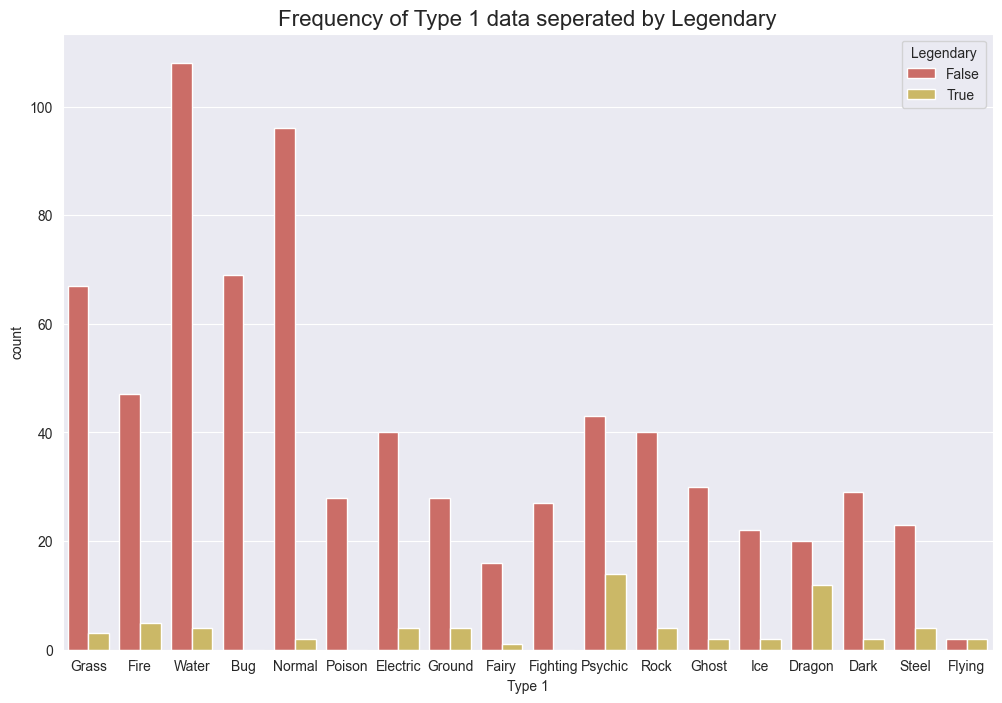

In [5]:
sns.set_palette("hls", 8)
plt.figure(figsize=(12,8))
sns.countplot(x ="Type 1", data=pokemon, hue ="Legendary")
plt.title("Frequency of Type 1 data seperated by Legendary", fontsize = 16)

Пример, когда график сложно воспринимается визуально:

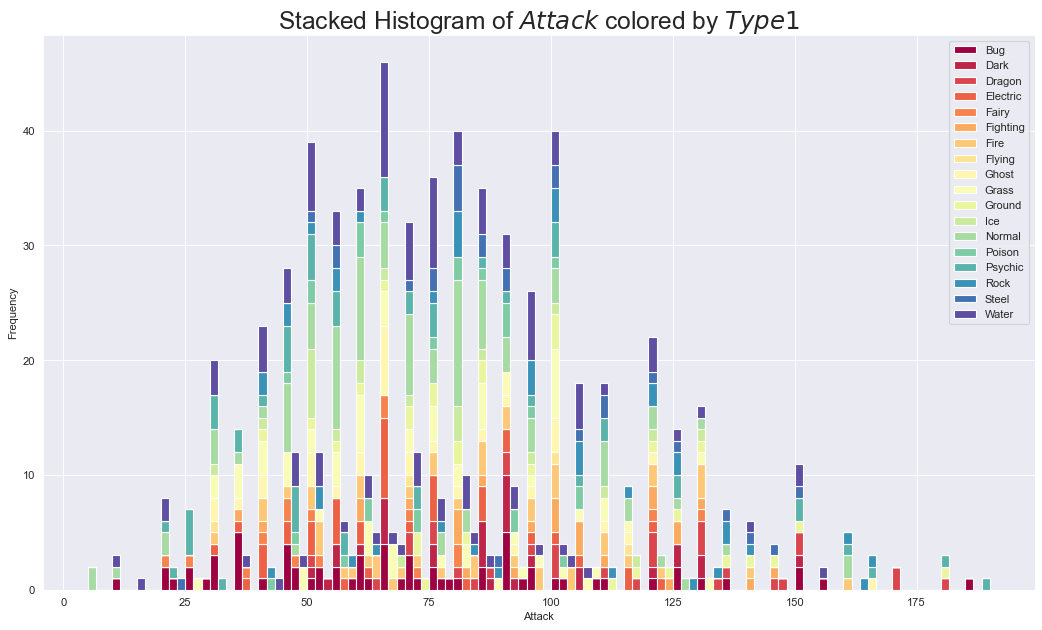

In [6]:
x_var = 'Attack'
groupby_var = 'Type 1'
df_agg = pokemon.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, pokemon[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])

plt.legend({group:col for group, col in zip(np.unique(pokemon[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.show()